# Determinação da aceleração da gravidade 

### Alunos: Arthur Cadore Matuella Barcella e Faber Bernardo Júnior. 

- **Objetivo:** Determinar a aceleração da gravidade utilizando um pêndulo simples.

- **Cenário:**
  - Pêndulo simples (fio e peso)
  - Cronômetro
  - Régua 

- **Procedimento:** 
    1. Medir o comprimento do fio do ponto de suspensão até o centro de massa do peso.
    2. Desloque o peso para um pequeno ângulo e solte-o, iniciando a contagem do tempo com o cronômetro.
    3. Meça o tempo que leva para completar várias oscilações (por exemplo, 5 oscilações) e registre esse tempo.
    5. Calcule o período médio dividindo o tempo total pelo número de oscilações.   


In [151]:
# Bibliotecas: 
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, Math
import matplotlib.pyplot as plt
from scipy.stats import norm

### Calculando Comprimento e Variação do comprimento (Delta L)

In [152]:
# Variaveis do cenário de medição:
l1 = 62  # Comprimento da corda (cm)
l2 = 2.3 # comprimento gancho (cm)
D = 2.85 # Diâmetro do peso (cm)

# Calculo de L (Comprimento do fio + comprimento do gancho + diâmetro do peso / 2 )

L_cm = l1 + l2 + D / 2

# Convertendo para metros
L = L_cm / 100 

# Calculo de deltaL seguindo menor valor de escala /2
DeltaL = 0.0005
print(f"DeltaL: {DeltaL:.4f} m")

# Calculo do L total
L = DeltaL + L 
print(f"Comprimento L: {L:.8f} m")

DeltaL: 0.0005 m
Comprimento L: 0.65775000 m


### Amostrando os valores de tempo (5 Oscilações)

In [153]:
periodos = [8.19, 8.14, 8.17, 8.22, 8.05]

In [154]:
# Cálculo do período médio
periodo_medio = np.array(list(periodos))
periodo_medio = np.mean(periodo_medio) 
print(f"Período médio: {periodo_medio:.4f} s")

Período médio: 8.1540 s


In [155]:
# Cria um vetor de deltaTs diminuindo o periodo médio de cada valor do vetor periodos
deltaTs = np.array(list(periodos)) - periodo_medio
print(f"Delta Ts: {deltaTs}")

Delta Ts: [ 0.036 -0.014  0.016  0.066 -0.104]


In [156]:
# Monta um DataFrame com os dados
periodos_1 = [p / 5 for p in periodos]

df = pd.DataFrame({
    '(5 Oscilações)': periodos,
    '(1 Oscilação)': periodos_1,
    '(Delta Ts)': deltaTs
})

# Configurar exibição sem notação científica e com precisão definida
pd.set_option('display.float_format', '{:.4f}'.format)

df

# imprime o DataFrame como csv: 

print("\n DataFrame como CSV:")
print(df.to_csv(index=False))


 DataFrame como CSV:
(5 Oscilações),(1 Oscilação),(Delta Ts)
8.19,1.638,0.03599999999999959
8.14,1.6280000000000001,-0.013999999999999346
8.17,1.634,0.016000000000000014
8.22,1.6440000000000001,0.06600000000000072
8.05,1.61,-0.1039999999999992



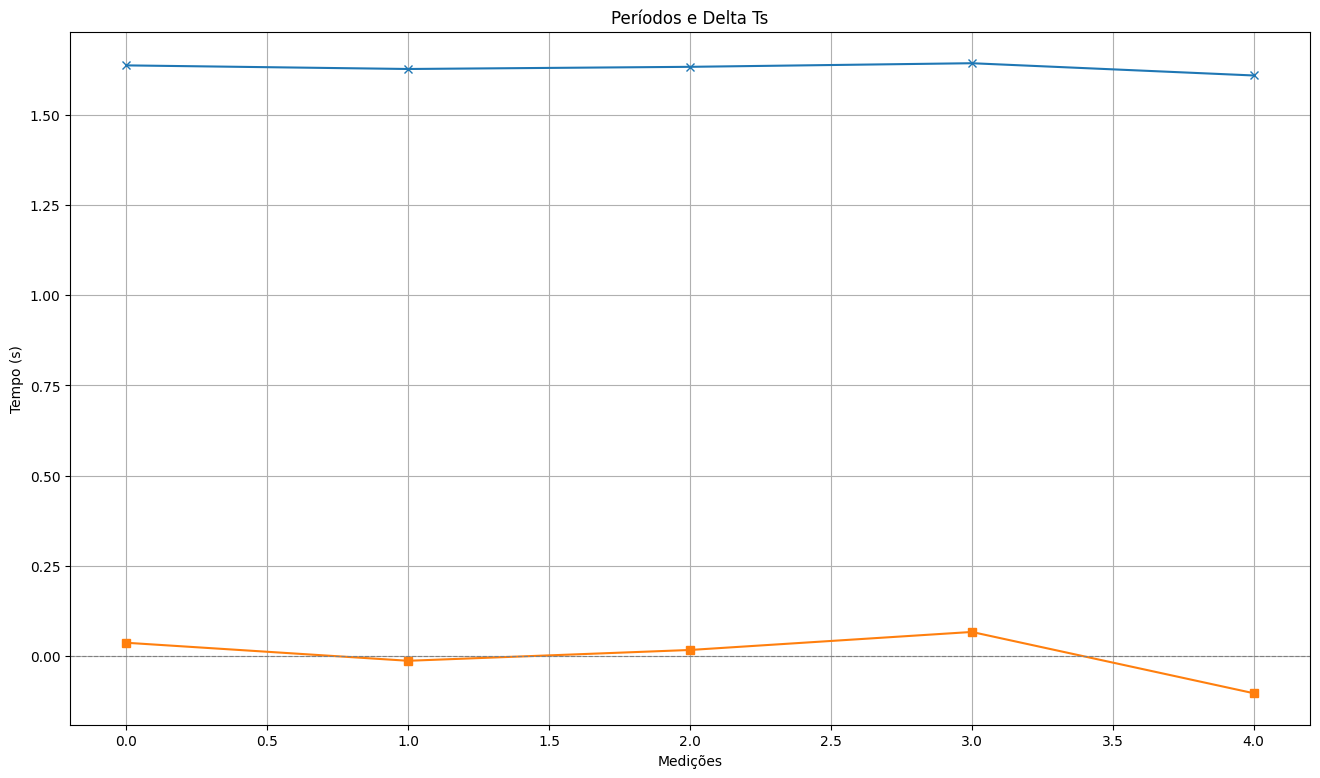

In [157]:
# plota os periodos e o deltaTs

plt.figure(figsize=(16, 9))
plt.plot(periodos_1, label='Períodos (1 Oscilação)', marker='x')
plt.plot(deltaTs, label='Delta Ts', marker='s')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title('Períodos e Delta Ts')
plt.xlabel('Medições')
plt.ylabel('Tempo (s)')
plt.grid()

In [158]:
# Calcula o desvio padrão dos deltaTs
print("\nDesvio Padrão dos Delta Ts:")
display(Math(r"\sigma = \frac{\sqrt{\sum \Delta T_s^2}}{n - 1}"))

sigma = np.sqrt(np.sum(deltaTs ** 2)) / (len(deltaTs) - 1)
print(f"sigma: {sigma:.4f} s")


Desvio Padrão dos Delta Ts:


<IPython.core.display.Math object>

sigma: 0.0325 s


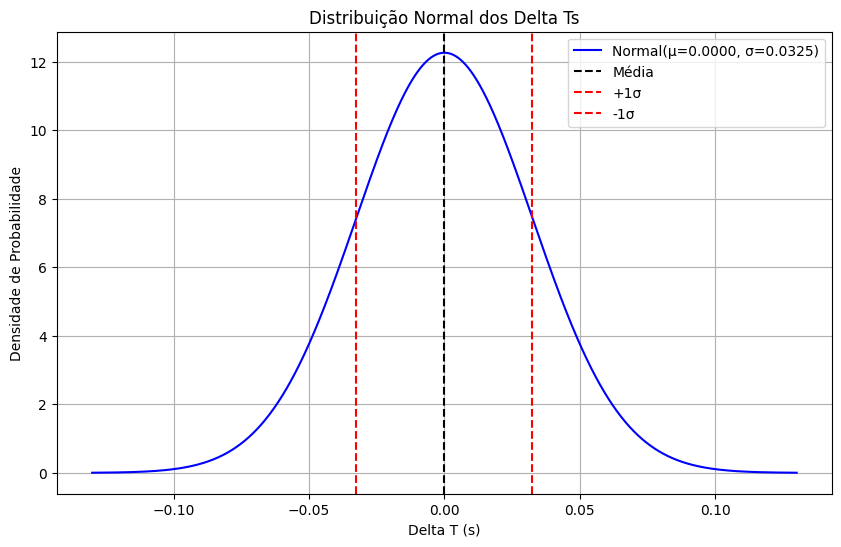

In [159]:
# Média dos deltaTs
mu = np.mean(deltaTs)

# Geração dos pontos do eixo x
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Função densidade da normal
y = norm.pdf(x, mu, sigma)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f'Normal(μ={mu:.4f}, σ={sigma:.4f})', color='blue')
plt.title('Distribuição Normal dos Delta Ts')
plt.xlabel('Delta T (s)')
plt.ylabel('Densidade de Probabilidade')
plt.axvline(mu, color='black', linestyle='--', label='Média')
plt.axvline(mu + sigma, color='red', linestyle='--', label='+1σ')
plt.axvline(mu - sigma, color='red', linestyle='--', label='-1σ')
plt.grid(True)
plt.legend()
plt.show()


In [160]:
# Calcula o deltaTm (erro médio)
print("\nCálculo do Delta Tm:")
display(Math(r"\Delta T_m = \frac{\sigma}{\sqrt{n}}"))
DeltaTm = sigma / np.sqrt(len(deltaTs))
print(f"Delta Tm: {DeltaTm:.8f} s")


Cálculo do Delta Tm:


<IPython.core.display.Math object>

Delta Tm: 0.01454304 s


In [161]:
T = (periodo_medio + DeltaTm) / 5 
print(f"Período médio: {T:.4f} s")


Período médio: 1.6337 s


In [162]:
# Calculando G
print("\nCálculo da aceleração da gravidade:")
display(Math(r"g = \frac{L}{\left(\frac{T}{2\pi}\right)^2} = \frac{L \cdot (2\pi)^2}{T^2}"))
g1 = L * (2 * pi) ** 2 / T ** 2
print(f"Aceleração da gravidade: {g1:.4f} m/s²")


Cálculo da aceleração da gravidade:


<IPython.core.display.Math object>

Aceleração da gravidade: 9.7291 m/s²


In [163]:
# Exibe as fórmulas em LaTeX
print("\n Rearanjando a fórmula para g:")
display(Math(r"g = \frac{{(2 \pi)}^2 L}{T^2}  =  \frac{4\pi^2 L}{T^2}"))

print("\n Aplicando derivadas parciais para calcular a incerteza propagada:")
display(Math(r"\Delta g = \sqrt{ \left( \frac{\partial g}{\partial L} \cdot \Delta L \right)^2 + \left( \frac{\partial g}{\partial T} \cdot \Delta T \right)^2 }"))

print("\n Derivadas parciais:")
display(Math(r"\frac{\partial g}{\partial L} = \frac{4\pi^2}{T^2} \quad \text{e} \quad \frac{\partial g}{\partial T} = -\frac{8\pi^2 L}{T^3}"))



 Rearanjando a fórmula para g:


<IPython.core.display.Math object>


 Aplicando derivadas parciais para calcular a incerteza propagada:


<IPython.core.display.Math object>


 Derivadas parciais:


<IPython.core.display.Math object>

In [164]:
# Calculando as derivadas parciais

# Derivadas parciais
dg_dL = (4 * pi**2) / T**2
dg_dT = (-8 * pi**2 * L) / T**3

# Cálculo da incerteza propagada
delta_g = np.sqrt((dg_dL * DeltaL)**2 + (dg_dT * DeltaTm)**2)

# Exibição dos resultados
print(f"∂g/∂L = {dg_dL:.6f}")
print(f"∂g/∂T = {dg_dT:.6f}")
print(f"Erro propagado Δg = {delta_g:.6f} m/s²")

# Valor final de g com incerteza
g_final = g1
print(f"Aceleração da gravidade: {g_final:.4f} ± {delta_g:.4f} m/s²")


∂g/∂L = 14.791443
∂g/∂T = -11.910412
Erro propagado Δg = 0.173371 m/s²
Aceleração da gravidade: 9.7291 ± 0.1734 m/s²


In [165]:
display(Math(r"g_2 = g_1 + E_{\Delta G}"))
g2 = g1 + delta_g
print(f"Aceleração da gravidade com erro: {g2:.2f} m/s²")

<IPython.core.display.Math object>

Aceleração da gravidade com erro: 9.90 m/s²
